In [24]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, accuracy_score

In [26]:
X,y=load_iris(return_X_y=True,as_frame=True)
y=(y==1).astype(int)

In [39]:
lr = LogisticRegression()
lr.fit(X[['petal width (cm)']],y)
y_pred = lr.predict(X[['petal width (cm)']])

In [40]:
lr.coef_, lr.intercept_

(array([[0.31674312]]), array([-1.08273597]))

In [34]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [33]:
confusion_matrix(y,y_pred).ravel()

array([88, 12, 29, 21], dtype=int64)

In [188]:
def quadratic_data(return_theta=False, return_test=False, noise=4, **kwargs):
    m = 100
    flip = -1 if np.random.rand()>.5 else 1

    X = (np.random.uniform(np.random.randint(-10,-2),np.random.randint(2,10),m)).reshape(-1,1)
    y = (X**2 + X + 2 + (np.random.randn(m, 1) * noise)) * flip
    df = (
        pd.DataFrame(np.c_[np.ones((m, 1)), X, X**2, y], columns=['X_b','X', 'XX','y'])
        .reset_index()
        .rename(columns={'index':'i'})
    )

    r = {}

    if return_theta:
        lr = LinearRegression()
        lr.fit(df[['X','XX']],y)
        theta0_best, theta1_best, theta2_best = lr.intercept_[0], lr.coef_[0][0], lr.coef_[0][1]
        r['theta0_best'] = theta0_best
        r['theta1_best'] = theta1_best
        r['theta2_best'] = theta2_best
    
    if return_test:
        r['data_train'] = json.loads(df[:int(m/2)].to_json(orient='records'))
        r['data_test'] = json.loads(df[int(m/2):].to_json(orient='records'))
    else:
        r['data'] = json.loads(df.to_json(orient='records'))

    return r

<AxesSubplot:xlabel='X', ylabel='y'>

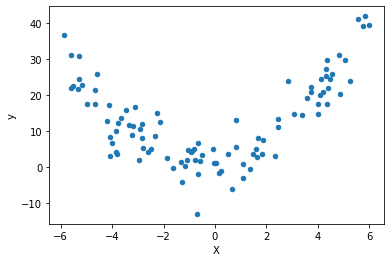

In [215]:
pd.DataFrame(quadratic_data(noise=5)['data']).plot(kind='scatter', x='X', y='y')

In [80]:
def logreg_data(y_idx=2,X_idx=2,return_theta=False,**kwargs):
    X,y=load_iris(return_X_y=True, as_frame=True)
    X = X.iloc[:,X_idx]
    y = (y == y_idx).astype(int)

    r = {'data': json.loads(pd.DataFrame({'X':X,'y':y}).to_json(orient='records'))}

    if return_theta:
        lr = LogisticRegression()
        lr.fit(X.to_numpy().reshape(-1,1),y.ravel())
        theta0_best, theta1_best = lr.intercept_[0], lr.coef_[0][0]
        r['theta0_best'] = theta0_best
        r['theta1_best'] = theta1_best

    return r

In [83]:
logreg_data(X_idx=0,y_idx=0,return_theta=True)

{'data': [{'X': 5.1, 'y': 1},
  {'X': 4.9, 'y': 1},
  {'X': 4.7, 'y': 1},
  {'X': 4.6, 'y': 1},
  {'X': 5.0, 'y': 1},
  {'X': 5.4, 'y': 1},
  {'X': 4.6, 'y': 1},
  {'X': 5.0, 'y': 1},
  {'X': 4.4, 'y': 1},
  {'X': 4.9, 'y': 1},
  {'X': 5.4, 'y': 1},
  {'X': 4.8, 'y': 1},
  {'X': 4.8, 'y': 1},
  {'X': 4.3, 'y': 1},
  {'X': 5.8, 'y': 1},
  {'X': 5.7, 'y': 1},
  {'X': 5.4, 'y': 1},
  {'X': 5.1, 'y': 1},
  {'X': 5.7, 'y': 1},
  {'X': 5.1, 'y': 1},
  {'X': 5.4, 'y': 1},
  {'X': 5.1, 'y': 1},
  {'X': 4.6, 'y': 1},
  {'X': 5.1, 'y': 1},
  {'X': 4.8, 'y': 1},
  {'X': 5.0, 'y': 1},
  {'X': 5.0, 'y': 1},
  {'X': 5.2, 'y': 1},
  {'X': 5.2, 'y': 1},
  {'X': 4.7, 'y': 1},
  {'X': 4.8, 'y': 1},
  {'X': 5.4, 'y': 1},
  {'X': 5.2, 'y': 1},
  {'X': 5.5, 'y': 1},
  {'X': 4.9, 'y': 1},
  {'X': 5.0, 'y': 1},
  {'X': 5.5, 'y': 1},
  {'X': 4.9, 'y': 1},
  {'X': 4.4, 'y': 1},
  {'X': 5.1, 'y': 1},
  {'X': 5.0, 'y': 1},
  {'X': 4.5, 'y': 1},
  {'X': 4.4, 'y': 1},
  {'X': 5.0, 'y': 1},
  {'X': 5.1, 'y': 1},
  

In [21]:
X.iloc[:,2]

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal length (cm), Length: 150, dtype: float64

In [11]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: target, Length: 150, dtype: int32

In [6]:
def quadratic_data(return_theta=False, return_test=False, **kwargs):
    m = 100
    rand1 = np.random.randint(6,8)
    flip = -1 if np.random.rand()>.5 else 1

    X = rand1 * np.random.rand(m, 1) - (rand1/2)
    y = ((np.random.randint(5,15)/10) * X**2 + X + 2 + np.random.randn(m, 1)) * flip
    df = (
        pd.DataFrame(np.c_[np.ones((m, 1)), X, X**2, y], columns=['X_b','X', 'XX','y'])
        .reset_index()
        .rename(columns={'index':'i'})
    )

    r = {}

    if return_theta:
        lr = LinearRegression()
        lr.fit(df[['X','XX']],y)
        theta0_best, theta1_best, theta2_best = lr.intercept_[0], lr.coef_[0][0], lr.coef_[0][1]
        r['theta0_best'] = theta0_best
        r['theta1_best'] = theta1_best
        r['theta2_best'] = theta2_best
    
    if return_test:
        r['data_train'] = json.loads(df[:int(m/2)].to_json(orient='records'))
        r['data_test'] = json.loads(df[int(m/2):].to_json(orient='records'))
    else:
        r['data'] = json.loads(df.to_json(orient='records'))

    return r

In [7]:
d = quadratic_data(return_test=True)

In [122]:
def poly_data(degrees=30, **kwargs):
    d = quadratic_data(return_test=True)
    train = pd.DataFrame(d['data_train'])[['i','X','y']]
    test = pd.DataFrame(d['data_test'])[['i','X','y']]
    lr = LinearRegression()

    polynomials = []
    for degree in range(1, degrees+1):
        X_poly = PolynomialFeatures(degree=degree, include_bias=True).fit_transform(train['X'].to_numpy().reshape(-1,1))
        lr.fit(X_poly, train['y'])
        polynomials.append({
                'degree':degree,
                'theta': [round(lr.intercept_,10),*[round(x,10) for x in lr.coef_[1:]]],
                'X': X_poly.tolist()
            })
    
    return {
        'data_train': json.loads(train.to_json(orient='records')),
        'data_test': json.loads(test.to_json(orient='records')),
        'polynomials': polynomials
    }

In [123]:
poly_data(5)['polynomials'][2]

{'degree': 3,
 'theta': [1.8305590516, 1.1458962429, 1.2803400013, -0.0117474813],
 'X': [[1.0, 2.1875982582, 4.7855861392796735, 10.468939902754276],
  [1.0, -2.2409547912, 5.021878376202236, -11.253802407974076],
  [1.0, -2.5614428291, 6.560989366747813, -16.805599165257536],
  [1.0, -2.8414416378, 8.073790581023546, -22.94120473179776],
  [1.0, 0.5609263744, 0.31463839749752903, 0.176488975555315],
  [1.0, -1.1217549506, 1.2583341691956085, -1.4115425838043119],
  [1.0, -1.4105213812, 1.9895705668223556, -2.8063318239091357],
  [1.0, -1.2524386975, 1.5686026909954962, -1.964578711205394],
  [1.0, -2.5921731203, 6.719361485605838, -17.41774822856653],
  [1.0, 2.2196270327, 4.926744164292607, 10.935534530260842],
  [1.0, -1.4952713892, 2.2358365273600977, -3.3431823902898374],
  [1.0, 0.6495760368, 0.4219490275847949, 0.27408797707014493],
  [1.0, 0.9856530995, 0.9715120325539569, 0.9575738460883525],
  [1.0, 1.7288935991, 2.989073077008952, 5.167789310082918],
  [1.0, 0.0360485019, 0